In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *
import pandas as pd

Version 0.0.1


In [7]:
from sie.mcmc import MCMCModel,Bernoulli,Uniform,Cauchy,Normal,Jeffreys,Beta
rcParams['figure.figsize']=(8,6)

## Coin Flip Model

In [12]:
D=3
U=9
N=D+U

In [13]:
def P_data(data,θ):
    D,U=data
    N=D+U
    
    return D*log(θ) + (N-D)*log(1-θ)

In [19]:
def P_data(data,θ):
    D,U=data
    N=D+U
    
    distribution=Beta(D,N)
    return distribution(θ)

In [20]:
data=D,U
model=MCMCModel(data,P_data,
                θ=Uniform(0,1))

Sampling Prior...
Done.
0.26 s
Running MCMC...
Done.
0.90 s
figsize [8.0, 5.0]


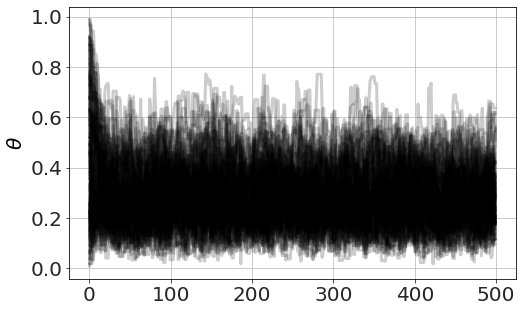

In [21]:
model.run_mcmc(500)
model.plot_chains()

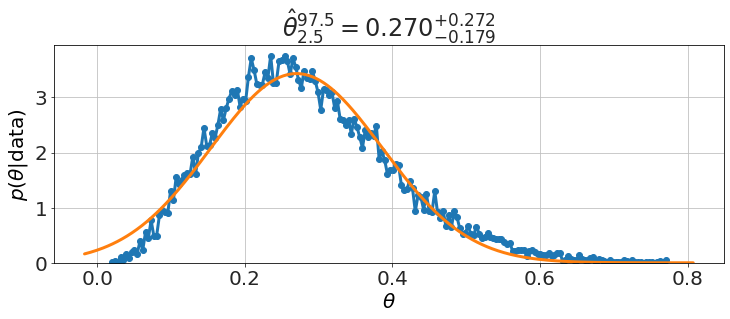

In [22]:
model.plot_distributions()

In [23]:
model.P("θ<=0.5")

0.9532

## Pennies

In [4]:
year,m=(array([1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974.]),
        array([3.133, 3.083, 3.175, 3.12 , 3.1  , 3.06 , 3.1  , 3.1  , 3.073,
        3.076, 3.1  , 3.11 , 3.08 , 3.1  , 3.093]))

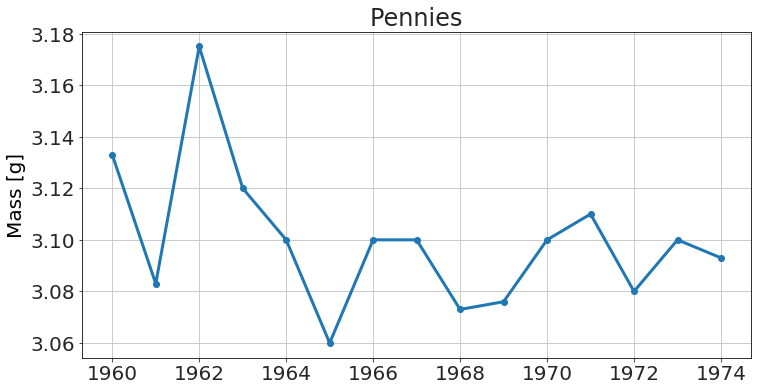

In [23]:
figure(figsize=(12,6))
plot(year,m,'-o')
ylabel('Mass [g]')
title('Pennies')
xticks(arange(1960,1974+1,2));

## Known  deviation, $\sigma$

\begin{align}
\mu &\sim {\rm Uniform}(-\infty,+\infty) \\
x_i &\sim {\rm Normal}(\mu,\sigma=0.1) \sim P(x_i|\mu,\sigma) = \frac{1}{2\pi\sigma^2}\cdot e^{-(x_i-\mu)^2/2/\sigma^2}
\end{align}

In [6]:
def P_data(data,μ):
    x=data
    σ=0.1
    distribution=Normal(μ,σ)
    return sum(distribution(data))

In [7]:
data=m
model=MCMCModel(data,P_data,
                μ=Uniform(0,10))

Sampling Prior...
Done.
0.27 s
Running MCMC...
Done.
1.37 s
figsize [8.0, 5.0]


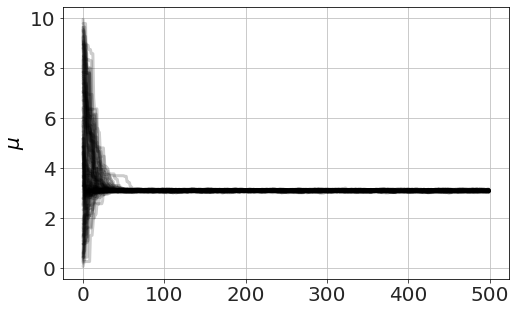

In [8]:
model.run_mcmc(500)
model.plot_chains()

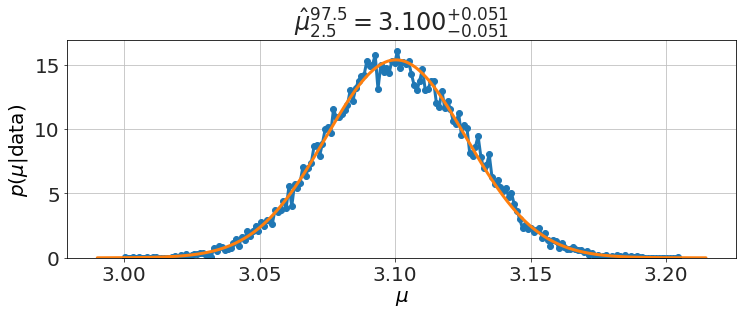

In [9]:
model.plot_distributions()

## Unknown $\sigma$

\begin{align}
\sigma &\sim {\rm Jeffreys}()\sim P(\sigma) = 1/\sigma \\
\mu &\sim {\rm Uniform}(-\infty,+\infty) \\
x_i &\sim {\rm Normal}(\mu,\sigma=0.1) \sim P(x_i|\mu,\sigma) = \frac{1}{2\pi\sigma^2}\cdot e^{-(x_i-\mu)^2/2/\sigma^2}
\end{align}

In [10]:
def P_data(data,μ,σ):
    x=data
    distribution=Normal(μ,σ)
    return sum(distribution(data))

In [12]:
data=m
model=MCMCModel(data,P_data,
                μ=Uniform(0,10),
                σ=Jeffreys(),
               )

Sampling Prior...
Done.
0.33 s
Running MCMC...
Done.
1.60 s
figsize [8.0, 10.0]


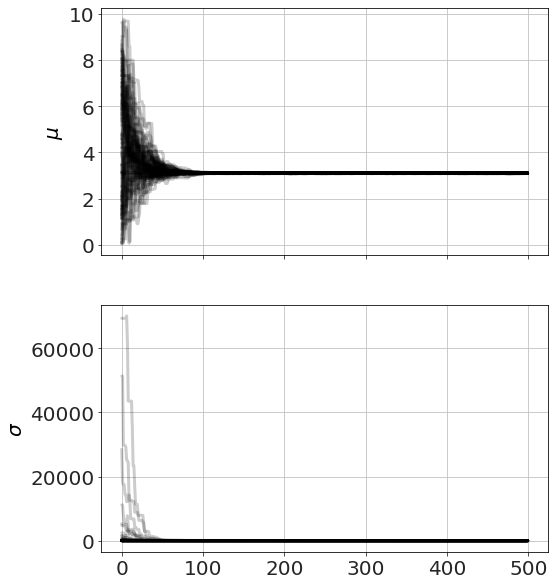

In [13]:
model.run_mcmc(500)
model.plot_chains()

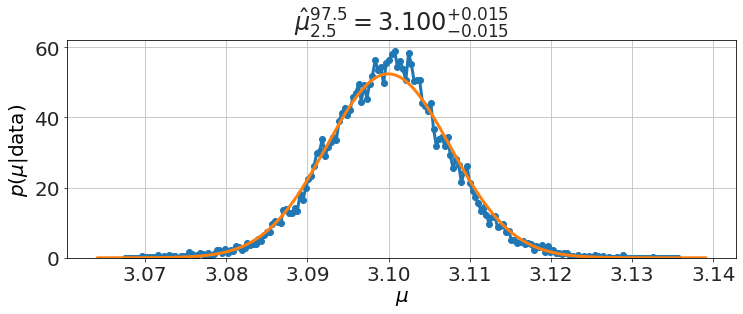

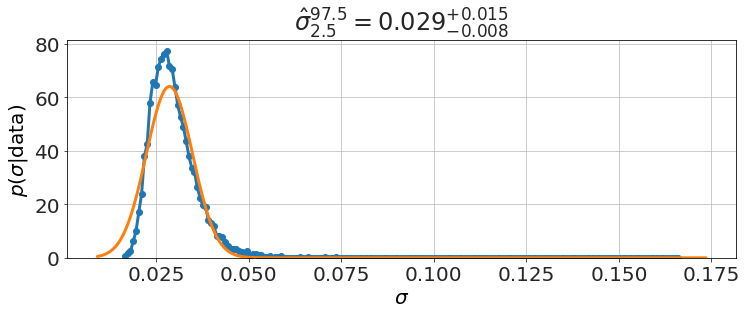

In [14]:
model.plot_distributions()

In [15]:
model.P("μ>3.1")

0.4975466666666667

## Lighthouse problem

\begin{align}
\alpha &\sim {\rm Uniform}(-\infty,+\infty) \\
x_i &\sim {\rm Cauchy}(\alpha,\beta=1)
\end{align}

In [6]:
def P_data(data,α):
    x=data
    β=1
    distribution=Cauchy(α,scale=β)
    return sum(distribution(data))

In [7]:
data=array([ -4.88670033,   1.02727087,   1.64012807,   1.16570506,
         0.74137098,   1.45785143,   0.75576402,  -7.16204611,
         0.30565497,   2.48463354,   0.98340414,   1.69667592,
         0.50776928, -26.27862631,   2.55648882,   0.85903135,
        -0.72341857,   0.40990678,   1.25050285,   1.61812728])

In [8]:
model=MCMCModel(data,P_data,
                α=Uniform(-10,10))

Sampling Prior...
Done.
0.27 s
Running MCMC...
Done.
1.29 s
figsize [8.0, 5.0]


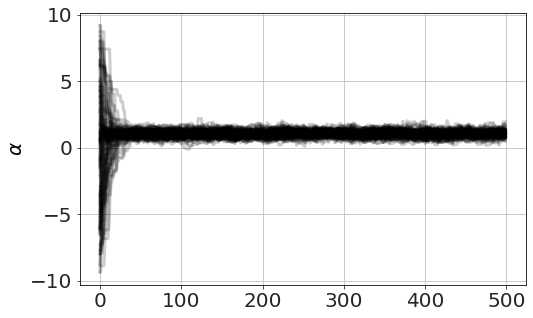

In [9]:
model.run_mcmc(500)
model.plot_chains()

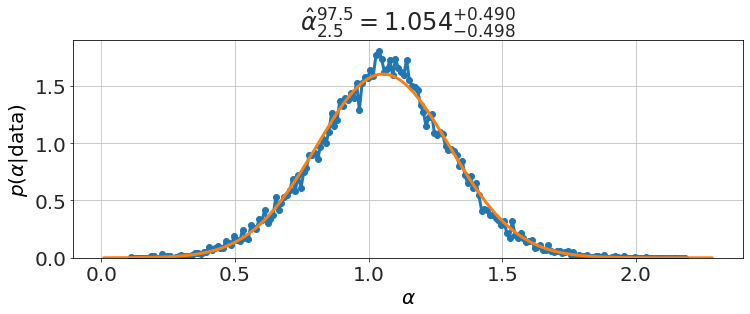

In [10]:
model.plot_distributions()

In [11]:
model.P("α>0.5")

0.98456

### the t-test doesn't work

In [12]:
N=len(data)
S=std(data,ddof=1)
K=1-20/N**2

mean(data),K*S/sqrt(N)

(-0.9795252979999999, 1.3588123211472174)

## Regression

In [21]:
data=pd.read_excel('data/Pennies.xlsx')
data.head()

,Year,Number of Pennies,Mass (g),Height (cm),Diameter (cm)
0,1960,3,9.4,0.452,1.902
1,1961,6,18.5,0.874,1.902
2,1962,4,12.7,0.694,1.902
3,1963,5,15.6,0.860,1.902
4,1964,15,46.5,2.242,1.902


Text(0.5, 1.0, 'Pennies')

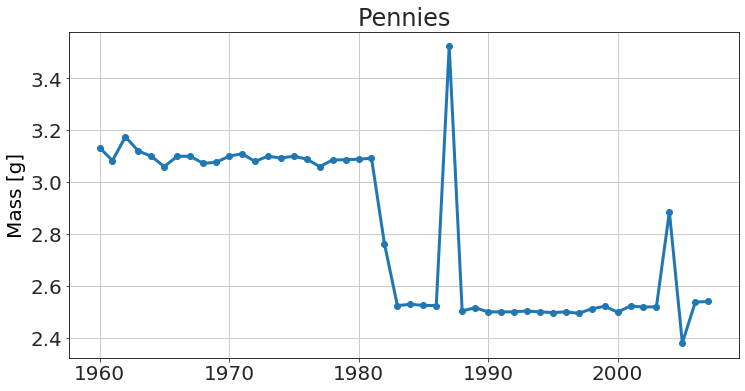

In [47]:
x=array(data['Year'])
M=array(data['Mass (g)'])
N=array(data['Number of Pennies'])
y=M/N


figure(figsize=(12,6))
plot(x,y,'-o')
ylabel('Mass [g]')
title('Pennies')

Text(0.5, 1.0, 'Pennies')

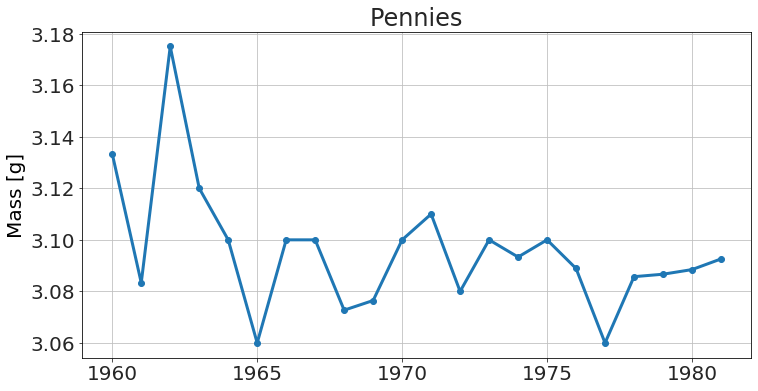

In [25]:
y=y[x<=1981]
x=x[x<=1981]

figure(figsize=(12,6))
plot(x,y,'-o')
ylabel('Mass [g]')
title('Pennies')

\begin{align}
\sigma &\sim {\rm Jeffreys}()\sim P(\sigma) = 1/\sigma \\
m &\sim {\rm Normal}(0,10)\\
b &\sim {\rm Uniform}(-\infty,+\infty)\\
\mu_i &= m x_i + b\\
y_i &\sim {\rm Normal}(\mu_i,\sigma) \sim P(x_i|\mu,\sigma) = \frac{1}{2\pi\sigma^2}\cdot e^{-(y_i-\mu_i)^2/2/\sigma^2}
\end{align}

In [26]:
def P_data(data,m,b,σ):
    x,y=data
    μ=m*x+b
    distribution=Normal(μ,σ)
    return sum(distribution(y))

In [31]:
data=x-1960,y
model=MCMCModel(data,P_data,
                m=Normal(0,10),
                b=Uniform(-10,10),
                σ=Jeffreys(),
               )

Running MCMC...
Done.
39.10 s
figsize [8.0, 15.0]


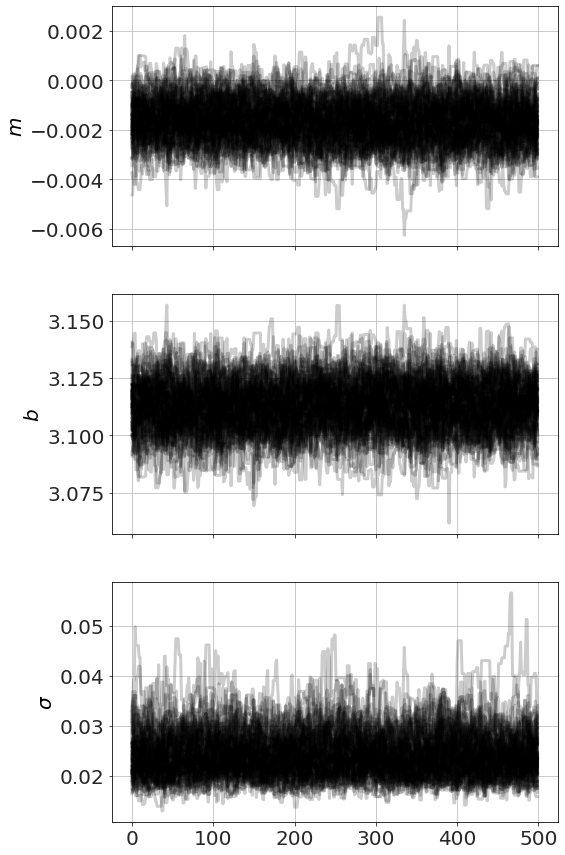

In [34]:
model.run_mcmc(500)
model.plot_chains()

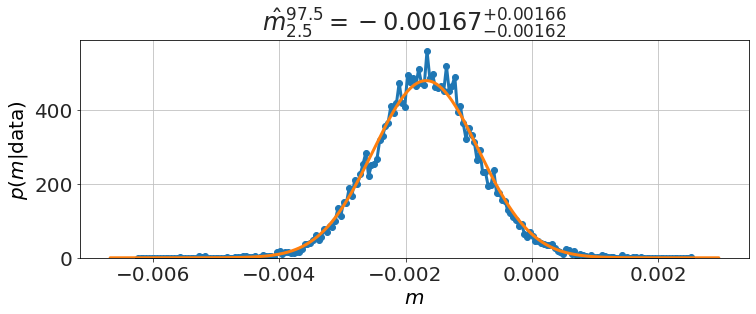

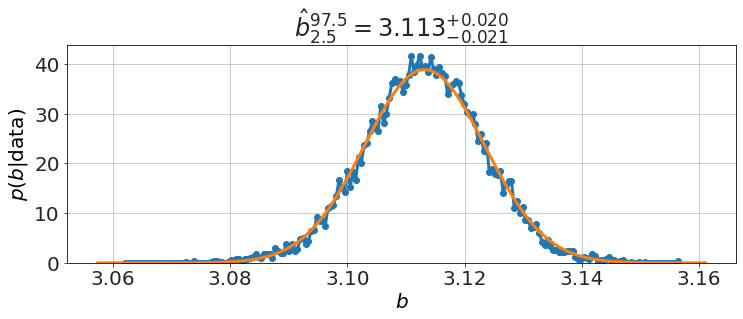

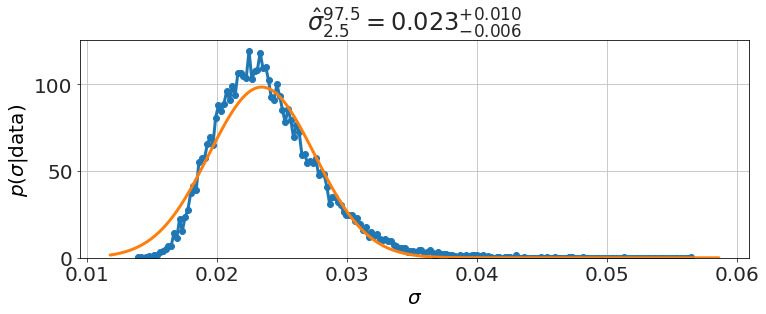

In [35]:
model.plot_distributions()

## Two-part model

Text(0.5, 1.0, 'Pennies')

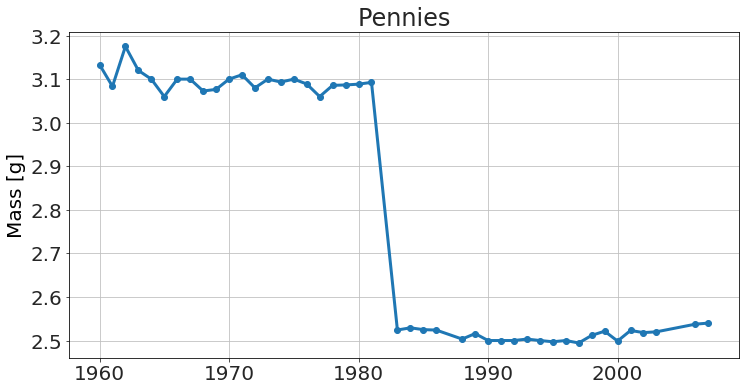

In [75]:
data=pd.read_excel('data/Pennies.xlsx')
x=array(data['Year'])
M=array(data['Mass (g)'])
N=array(data['Number of Pennies'])
y=M/N


# remove the outliers, for now
idx=where( (x<1982) | ((x>1982) & (y<2.6) & (y>2.4)))
x=x[idx]
y=y[idx]



figure(figsize=(12,6))
plot(x,y,'-o')
ylabel('Mass [g]')
title('Pennies')

In [76]:
def P_data(data,m1,b1,m2,b2,σ):
    x,y=data
    μ=m1*x+b1
    
    idx=where(x>=23)[0]
    μ[idx]=m2*x[idx]+b2
    
    distribution=Normal(μ,σ)
    return sum(distribution(y))

In [77]:
data=x-1960,y
model=MCMCModel(data,P_data,
                m1=Normal(0,10),
                b1=Uniform(-10,10),
                m2=Normal(0,10),
                b2=Uniform(-10,10),
                σ=Jeffreys(),
               )

Running MCMC...
Done.
3.43 s
figsize [8.0, 25.0]


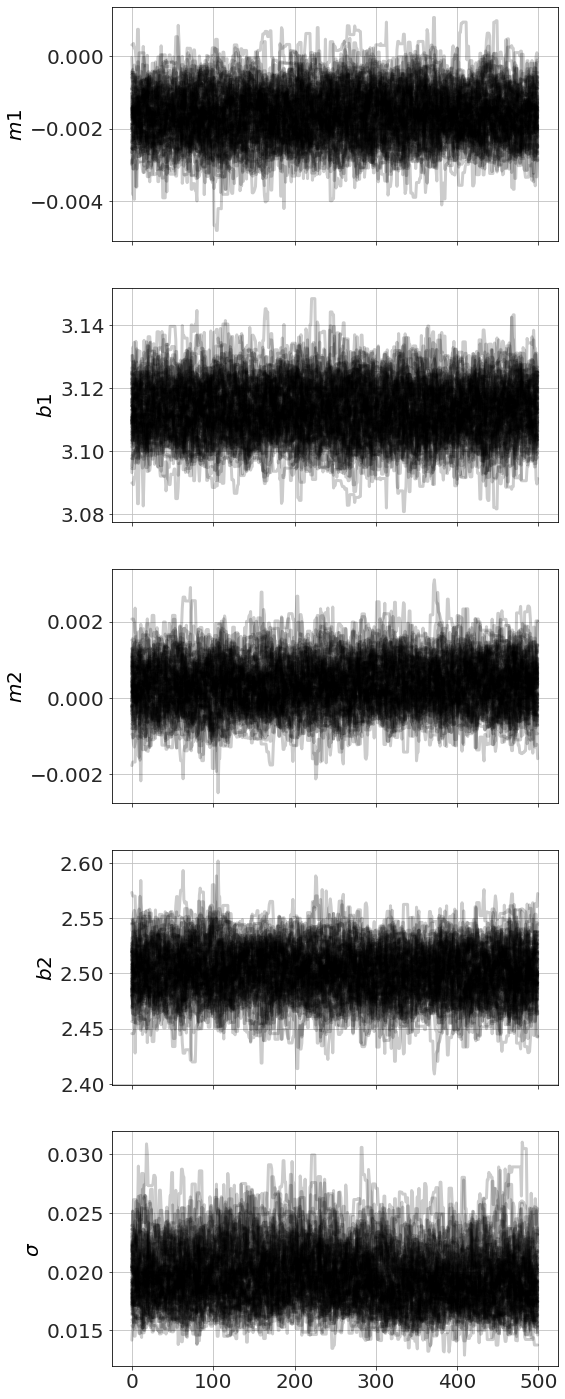

In [80]:
model.run_mcmc(500)
model.plot_chains()

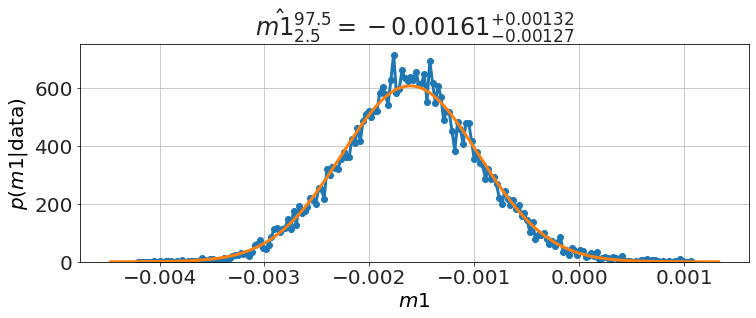

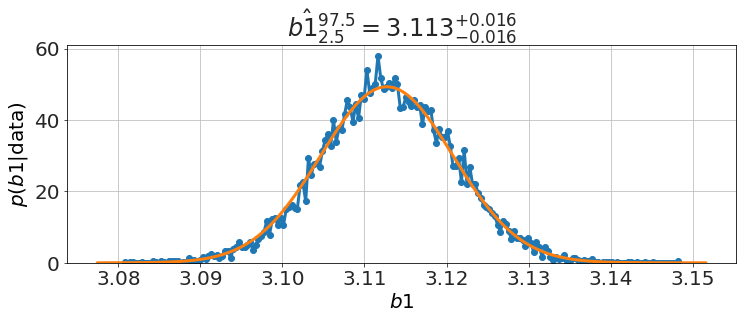

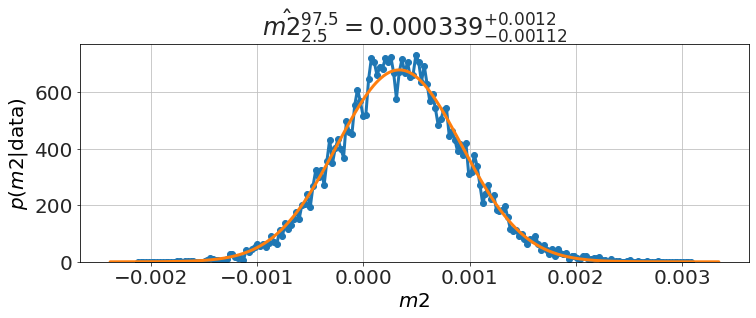

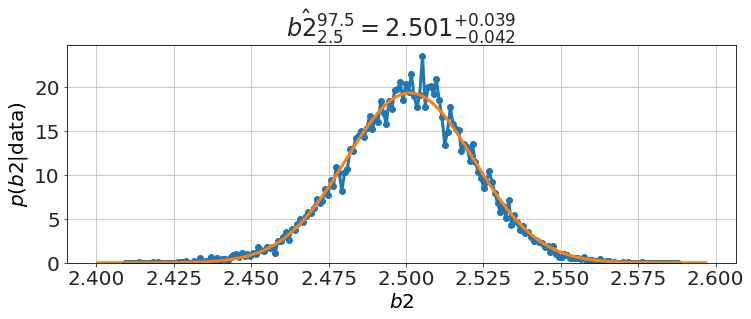

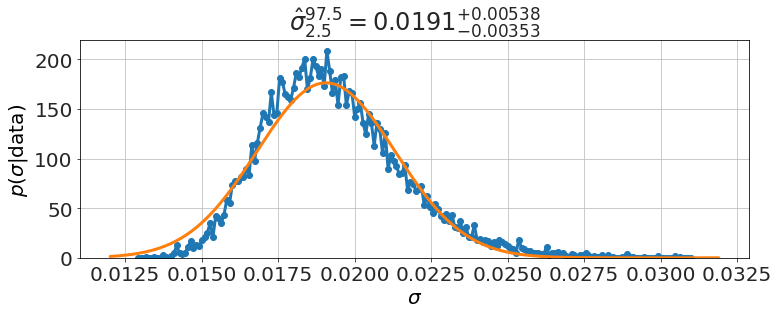

In [81]:
model.plot_distributions()

# Pyndamics

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pyndamics import Simulation
from pyndamics.emcee import *

pyndamics version  0.0.8


## Growth of a sunflower

Data from [http://www.seattlecentral.edu/qelp/sets/009/009.html](http://www.seattlecentral.edu/qelp/sets/009/009.html)

Text(0, 0.5, 'Height [cm]')

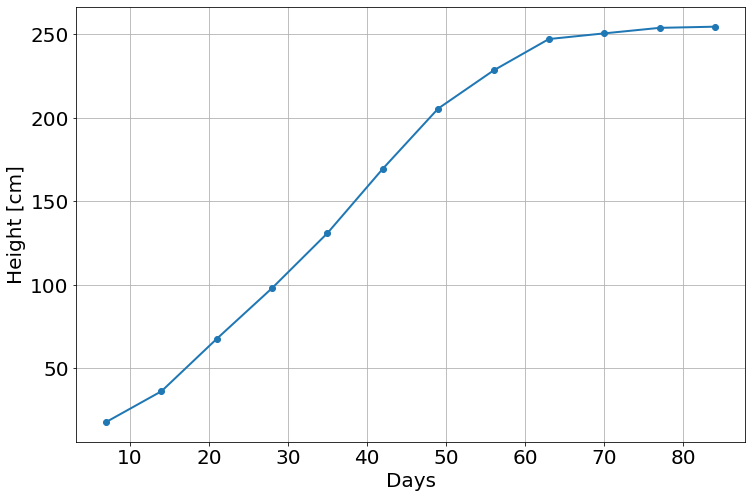

In [3]:
t=array([7,14,21,28,35,42,49,56,63,70,77,84],float)
h=array([17.93,36.36,67.76,98.10,131,169.5,205.5,228.3,247.1,250.5,253.8,254.5])

plot(t,h,'-o')
xlabel('Days')
ylabel('Height [cm]')

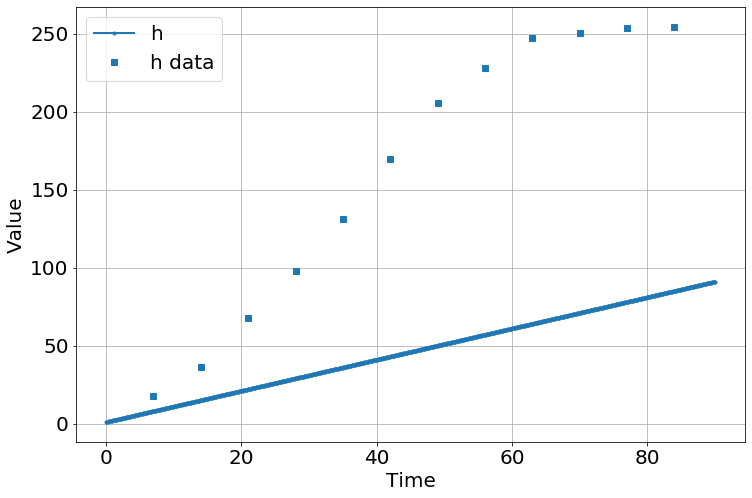

<Figure size 864x576 with 0 Axes>

In [4]:
sim=Simulation()
sim.add("h'=a",1,plot=True)
sim.add_data(t=t,h=h,plot=True)
sim.params(a=1)
sim.run(0,90)

In [5]:
model=MCMCModel(sim,a=Uniform(-10,10))

Sampling Prior...
Done.
0.33 s
Running MCMC...
Done.
29.27 s


<Figure size 864x576 with 0 Axes>

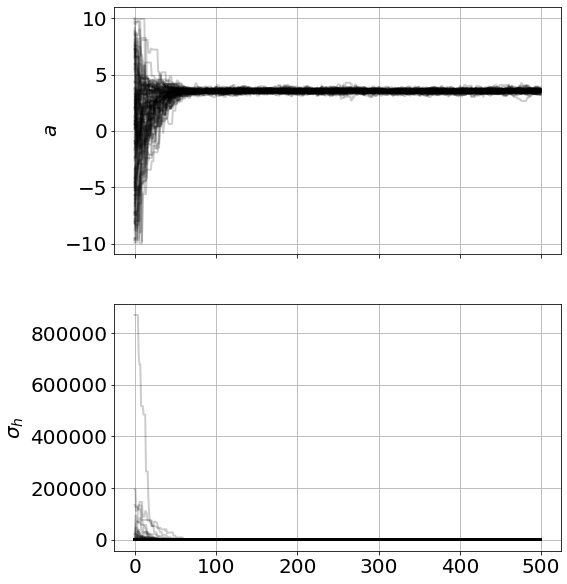

In [6]:
model.run_mcmc(500)
model.plot_chains()

In [7]:
model.best_estimates()

{'a': array([3.41563484, 3.54353294, 3.67271221]),
 '_sigma_h': array([18.6037312 , 22.72151988, 28.73240861])}

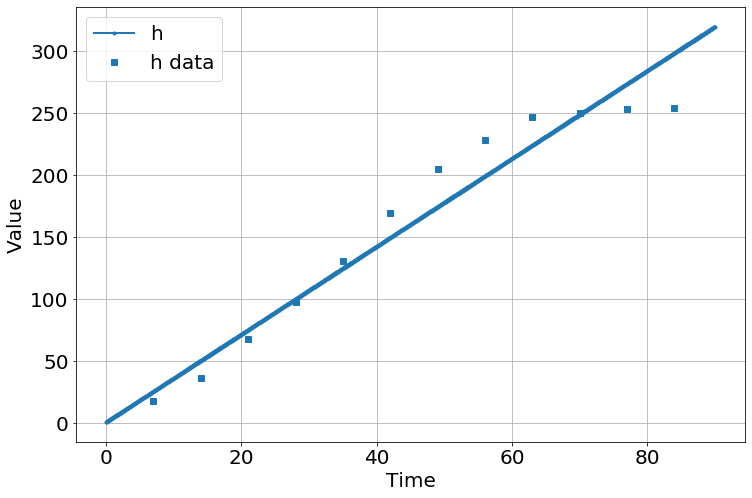

<Figure size 864x576 with 0 Axes>

In [8]:
sim.run(0,90)

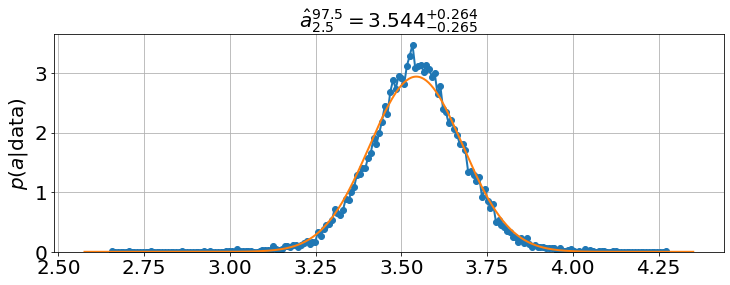

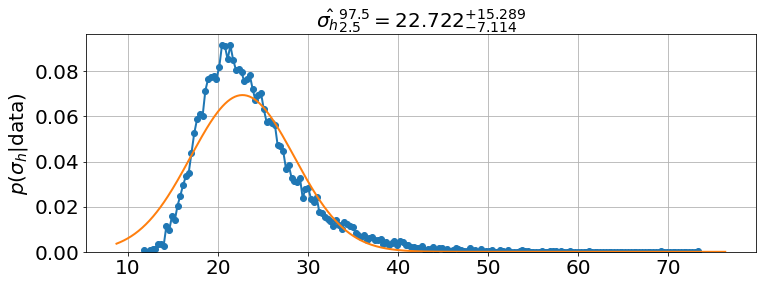

In [9]:
model.plot_distributions()

In [10]:
model=MCMCModel(sim,
                a=Uniform(-10,10),
                initial_h=Uniform(0,180),
                )

Sampling Prior...
Done.
0.39 s
Running MCMC...
Done.
26.85 s


<Figure size 864x576 with 0 Axes>

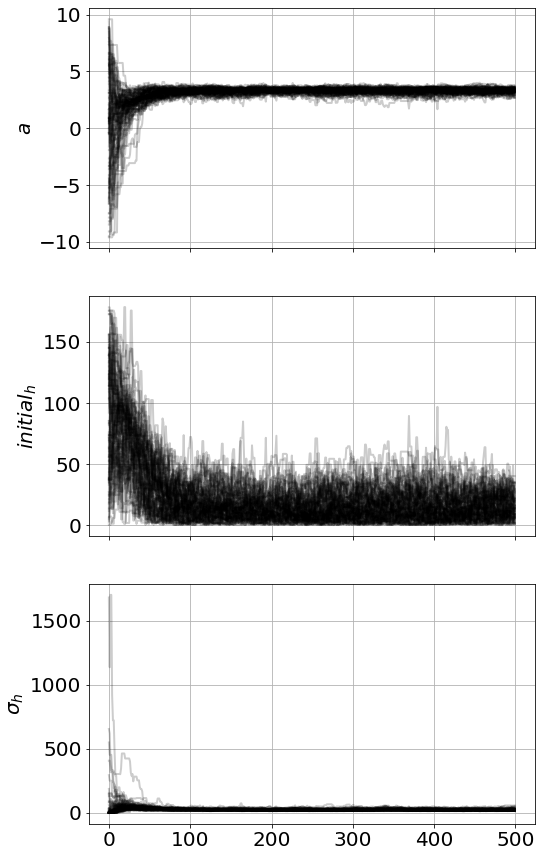

In [11]:
model.run_mcmc(500)
model.plot_chains()

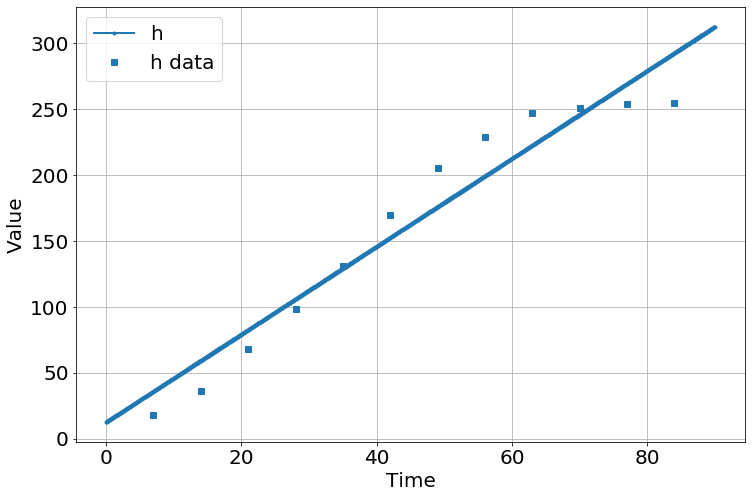

<Figure size 864x576 with 0 Axes>

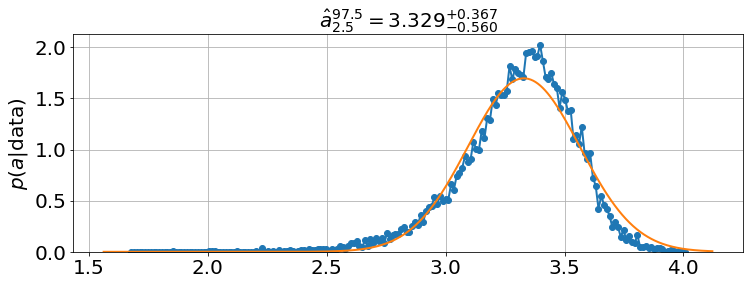

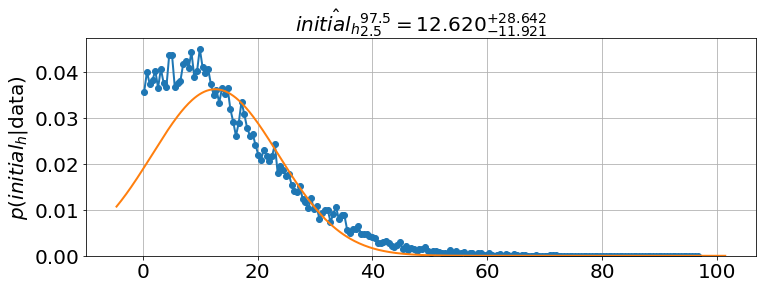

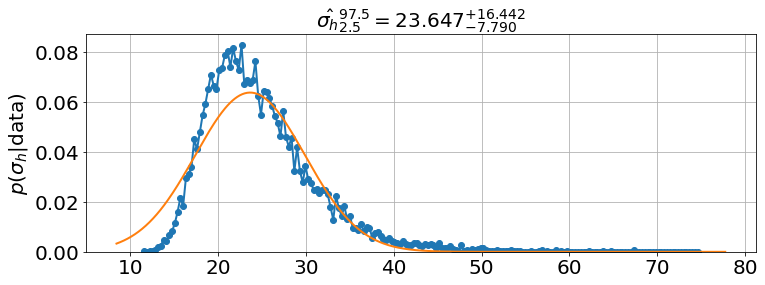

In [12]:
sim.run(0,90)
model.plot_distributions()

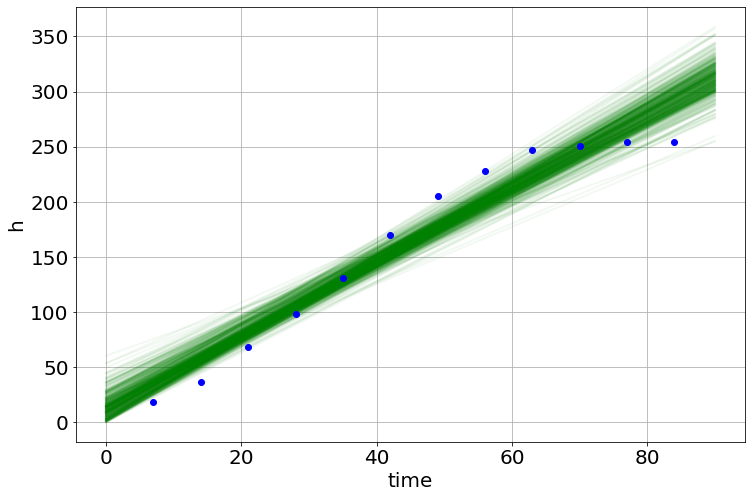

In [13]:
model.plot_many(0,90,'h')

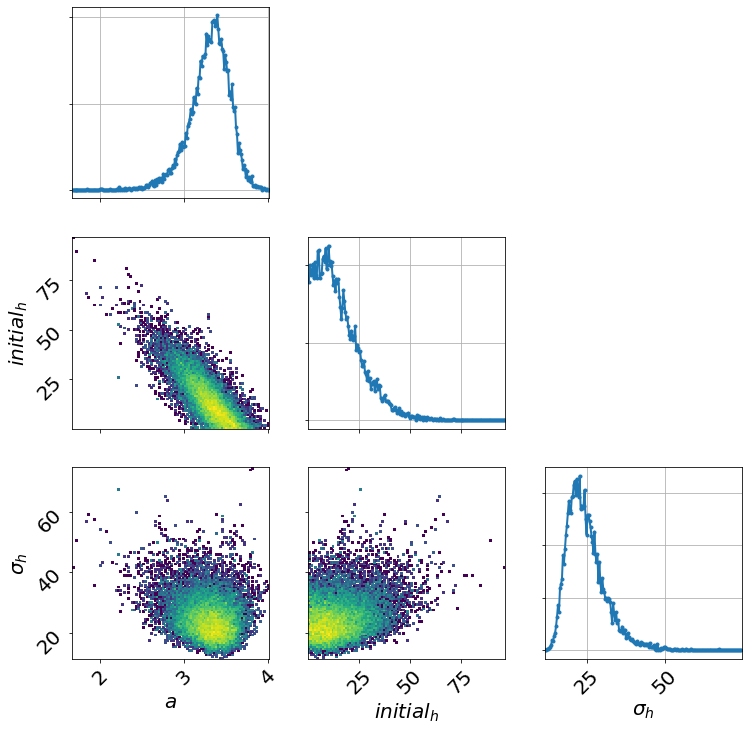

In [14]:
model.triangle_plot()

## Logistic growth

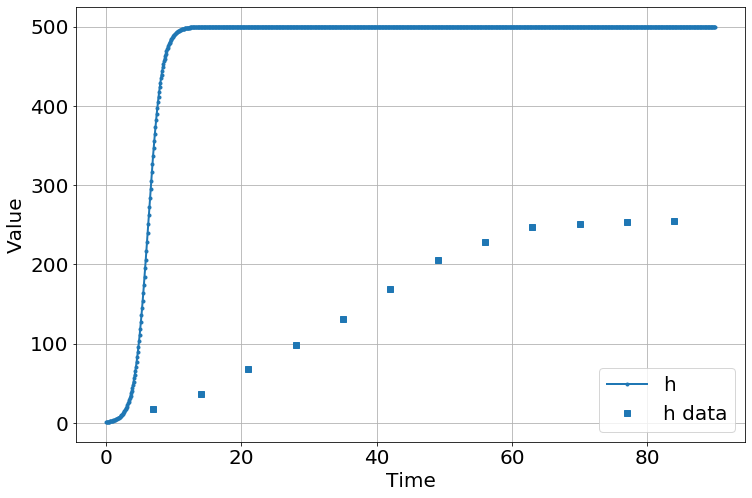

<Figure size 864x576 with 0 Axes>

In [15]:
sim=Simulation()
sim.add("h'=a*h*(1-h/K)",1,plot=True)
sim.add_data(t=t,h=h,plot=True)
sim.params(a=1,K=500)
sim.run(0,90)


In [18]:
model=MCMCModel(sim,
                a=Uniform(.001,5),
                K=Uniform(100,500),
                initial_h=Uniform(0,10),
                )

Sampling Prior...
Done.
0.41 s
Running MCMC...
Done.
35.54 s


<Figure size 864x576 with 0 Axes>

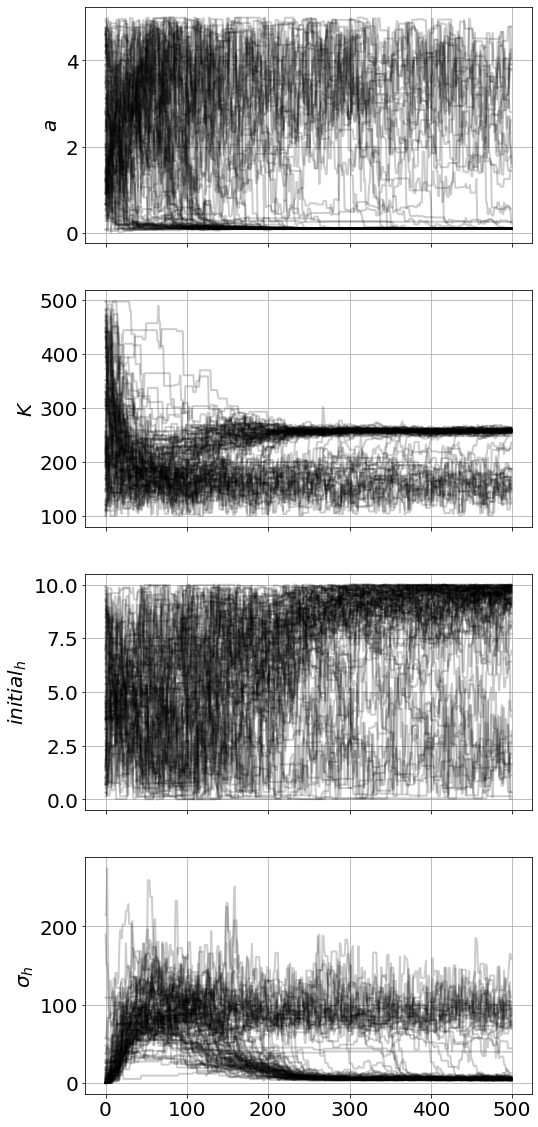

In [19]:
model.run_mcmc(500)
model.plot_chains()

Running MCMC...
Done.
40.21 s
Running MCMC...
Done.
41.28 s


<Figure size 864x576 with 0 Axes>

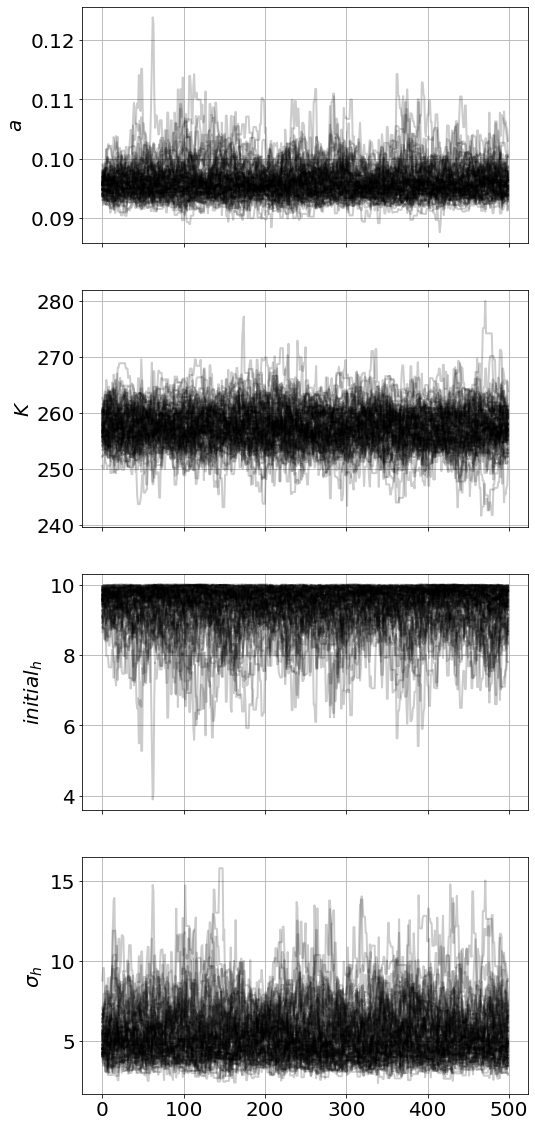

In [20]:
for i in range(2):
    model.set_initial_values('samples')  # reset using the 16-84 percentile values from the samples
    model.run_mcmc(500)
model.plot_chains()

In [21]:
model.best_estimates()

{'a': array([0.0937567 , 0.09543279, 0.0978184 ]),
 'K': array([254.63126456, 257.58069748, 260.58176114]),
 'initial_h': array([9.01918749, 9.62957053, 9.90519382]),
 '_sigma_h': array([3.94189111, 4.94053123, 6.5131181 ])}

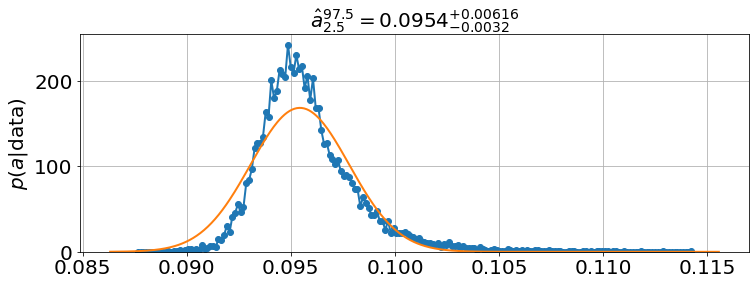

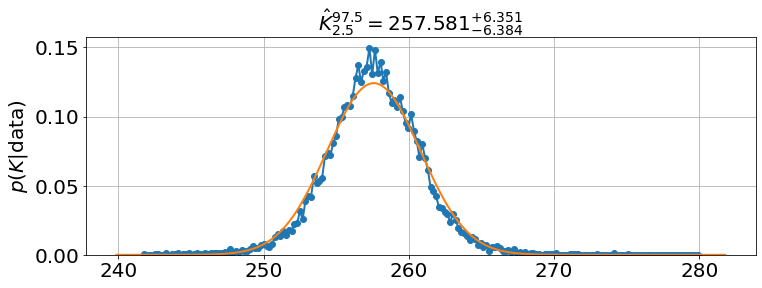

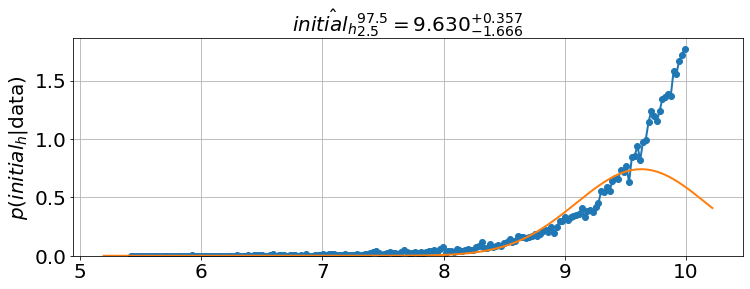

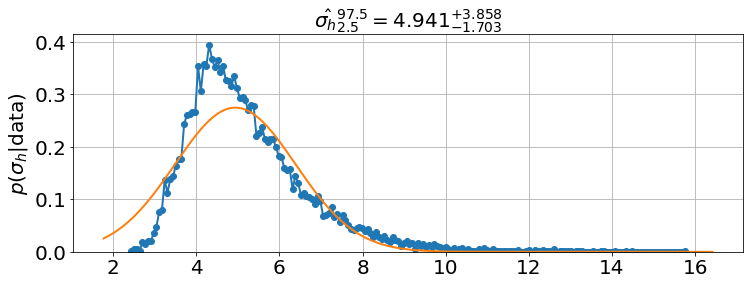

In [22]:
model.plot_distributions()

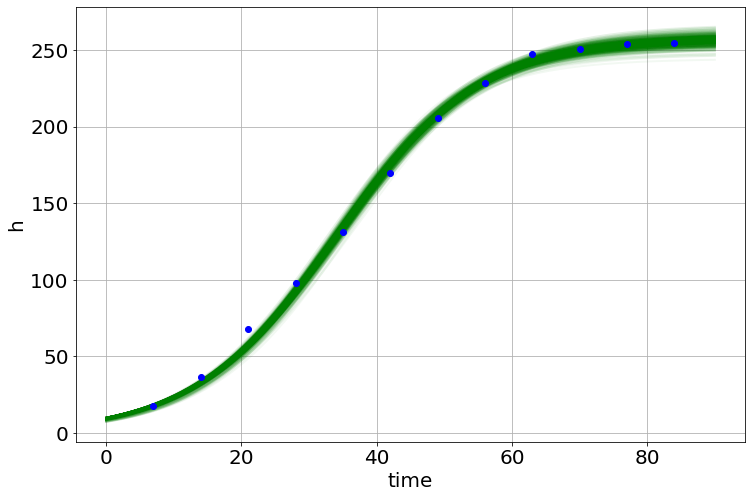

In [23]:
model.plot_many(0,90,'h')